In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

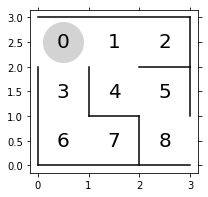

In [2]:
fig = plt.figure(figsize=(3, 3))

plt.plot([0, 3], [3, 3], color='k')
plt.plot([0, 3], [0, 0], color='k')
plt.plot([0, 0], [0, 2], color='k')
plt.plot([3, 3], [1, 3], color='k')
plt.plot([1, 1], [1, 2], color='k')
plt.plot([2, 3], [2, 2], color='k')
plt.plot([2, 1], [1, 1], color='k')
plt.plot([2, 2], [0, 1], color='k')

for i in range(3):
    for j in range(3):
        plt.text(0.5+i, 2.5-j, str(i+j*3), size=20, ha='center', va='center')

circle, = plt.plot([0.5], [2.5], marker='o', color='#d3d3d3', markersize=40)

# 目盛りと枠の非表示
plt.tick_params(axis='both', which='both', bottom='off', top= 'off',
        labelbottom='off', right='off', left='off', labelleft='off')
plt.box('off')

In [3]:
theta_0 = np.array([
    [np.nan, 1, 1, np.nan],
    [np.nan, 1, 1, 1],
    [np.nan, np.nan, np.nan, 1],
    [1, np.nan, 1, np.nan],
    [1, 1, np.nan, np.nan],
    [np.nan, np.nan, 1, 1],
    [1, 1, np.nan, np.nan],
    [np.nan, np.nan, np.nan, 1]
])

In [7]:
def get_pi(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    exp_theta = np.exp(theta)
    for i in range(0, m):
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
    pi = np.nan_to_num(pi)
    return pi

In [8]:
pi_0 = get_pi(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.5        0.        ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.5        0.5       ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.         1.        ]]


In [9]:
def get_action(pi, s):
    return np.random.choice([0, 1, 2, 3], p=pi[s])

In [11]:
def get_s_next(s, a):
    if a == 0:
        return s - 3
    elif a == 1:
        return s + 1
    elif a == 2:
        return s + 3
    elif a == 3:
        return s- 1

In [12]:
def play(pi):
    s = 0
    s_a_history = [[0, np.nan]]
    
    while True:
        a = get_action(pi, s)
        
        s_next = get_s_next(s, a)
        
        s_a_history[-1][1] = a
        s_a_history.append([s_next, np.nan])
        
        if s_next == 8:
            break
        else:
            s = s_next
            
    return s_a_history

In [13]:
s_a_history = play(pi_0)
print(s_a_history)
print('1エピソードのステップ数：{}'.format(len(s_a_history)+1))

[[0, 2], [3, 0], [0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 2], [4, 1], [5, 2], [8, nan]]
1エピソードのステップ数：12


In [14]:
def update_theta(theta, pi, s_a_history):
    eta = 0.1
    total = len(s_a_history)
    [s_count, a_count] = theta.shape
    
    delta_theta = theta.copy()
    for i in range(0, s_count):
        for j in range(0, a_count):
            if np.isnan(theta[i, j]):
                continue
            
            sa_ij = [sa for sa in s_a_history if sa == [i, j]]
            n_ij = len(sa_ij)
            
            sa_i = [sa for sa in s_a_history if sa[0] == i]
            n_i = len(sa_i)
            
            delta_theta[i, j] = (n_ij - pi[i, j] * n_i) / total
            
    return theta + eta + delta_theta

In [18]:
stop_epsilon = 10**-4
theta = theta_0
pi = pi_0

for episode in range(10000):
    s_a_history = play(pi)
    theta = update_theta(theta, pi, s_a_history)
    
    pi_new = get_pi(theta)
    
    pi_delta = np.sum(np.abs(pi_new - pi))
    pi = pi_new
    
    if episode % 100 == 0:
        print('エピソード: {}, ステップ： {}, 方策変化量: {:.4f}'.format(episode, len(s_a_history)-1, pi_delta))
    
    if pi_delta < stop_epsilon: # 方策の変化量がしきい値以下
        break

エピソード: 0, ステップ： 38, 方策変化量: 0.1057
エピソード: 100, ステップ： 4, 方策変化量: 0.0912
エピソード: 200, ステップ： 4, 方策変化量: 0.0177
エピソード: 300, ステップ： 4, 方策変化量: 0.0088
エピソード: 400, ステップ： 4, 方策変化量: 0.0020
エピソード: 500, ステップ： 4, 方策変化量: 0.0006
エピソード: 600, ステップ： 4, 方策変化量: 0.0004
エピソード: 700, ステップ： 4, 方策変化量: 0.0003
エピソード: 800, ステップ： 4, 方策変化量: 0.0003
エピソード: 900, ステップ： 4, 方策変化量: 0.0004
エピソード: 1000, ステップ： 4, 方策変化量: 0.0004
エピソード: 1100, ステップ： 4, 方策変化量: 0.0004
エピソード: 1200, ステップ： 4, 方策変化量: 0.0003
エピソード: 1300, ステップ： 4, 方策変化量: 0.0003
エピソード: 1400, ステップ： 4, 方策変化量: 0.0001


In [ ]:
def animate(i):
    state = s_a_history[i][0]
    circle.set_data((state % 3) + 0)